# G5 Cinemax – The Big Screen Experience!!


## Introduction

![Group5 logo](../images/g5.png)

G5 Cinemax Company Limited has observed the trend of major corporations investing in original video content and aims to establish its own competitive movie studio. As the directors/heads lack existing industry expertise, they mandated G5-Moringa Data Enthuasists to analyze current box office performance data to identify the most successful film genres and trends. The G5-Moringa Data Enthuasists will then synthesize this analysis into a strategic recommendations report to guide the studio head's decision-making on what types of films to produce which will be most profitable and have high ROI.

#### 1. Business Understanding
G5 Cinemax wants to enter the film industry by creating a new studio.

Goal: Identify what types of films perform best at the box office (e.g., genre, studio, release year, budget impact).

Translate findings into strategic recommendations for what types of films the studio should prioritize.

#### 2. Data Understanding
Data (Box Office Mojo) selected from the list give contains key attributes like:

Title – name of the movie

Studio – production/distribution company

Domestic Gross – US earnings

Foreign Gross – International earnings

Year – release year

#### 3. Data Preparation
This proceess will entail data preparation steps. Identification of the data to use. The currently selected data is from Box Office Mojo.

Identify the data to use
Check on the data duplicates and remove them
Check on missing data if any and impute the missing items
Data computation

#### 4. Data Analysis
The Data analysis process will majorly center on;

Explore genre performance: Which genres earn the most globally vs domestically?
Compare big studios vs small studios: Who dominates the market?
Check trends across years: Are superhero/action movies dominating recently?
#### 5. Select The Models for Regretion
Model 1: Predict domestic gross using foreign gross.
Model 2: Predict worldwide gross from studio & year.
Model 3: Genre effect on earnings (dummy variables).
#### 6. Visualization
The G5 Data Enthuansists focussed on visualizing the data in below details;

Stacked Bars – Contribution of foreign vs domestic grosses across genres.
Bar Charts – Top 10 genres by average worldwide gross.
Boxplots – Distribution of grosses by studio.
Line Charts – Trends of gross revenue by year.
Scatterplot – Domestic vs foreign gross (with regression line).
#### 7. Conclusion: Deliverables to the company Directors/Head:
After the data analysis and visualizations, the G5 Data enthuansists were mandated to give out the delieverables to the company heads as follows;

Clear summary of which genres are at the top.
Insights into domestic vs international earning dynamics.
Actionable recommendation: What kind of movies the company should invest in.

In [2]:
import pandas as pd          # data manipulation, reading CSV
import numpy as np           # numerical computations
import matplotlib.pyplot as plt   # plotting
import seaborn as sns             # prettier statistical plots
from datetime import datetime     # working with dates
import matplotlib.dates as mdates
from scipy import stats
from scipy.stats import pearsonr
# formatting date plots


#### Data understanding and final checks

In [3]:
#Import & inspect first 5 records of the data
df = pd.read_csv("../CleanedData/finalcombined.csv")
df.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,aka_title,region,language,...,domestic_gross,worldwide_gross,production_budget_num,domestic_gross_num,worldwide_gross_num,domestic_ratio,worldwide_ratio,profit_num,roi_num,domestic_pct
0,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,A Origem,BR,Unknown,...,"$292,576,195","$835,524,642",160000000.0,292576195.0,8.355246e+08,1.828601,5.222029,6.755246e+08,4.222029,35.017064
1,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769.0,A sötét lovag: Felemelkedés,HU,Unknown,...,"$448,139,099","$1,084,439,099",275000000.0,448139099.0,1.084439e+09,1.629597,3.943415,8.094391e+08,2.943415,41.324506
2,tt0816692,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334.0,Bein kokhavim,IL,he,...,"$188,017,894","$666,379,375",165000000.0,188017894.0,6.663794e+08,1.139502,4.038663,5.013794e+08,3.038663,28.214843
3,tt1853728,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405.0,Django,PL,Unknown,...,"$162,805,434","$449,948,323",100000000.0,162805434.0,4.499483e+08,1.628054,4.499483,3.499483e+08,3.499483,36.183141
4,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0,Angaarey Bane Sholey,IN,hi,...,"$623,279,547","$1,517,935,897",225000000.0,623279547.0,1.517936e+09,2.770131,6.746382,1.292936e+09,5.746382,41.060993


In [65]:
#Inspect the data
df.columns

Index(['movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'aka_title', 'region', 'language',
       'log_numVotes', 'runtime_winsorized', 'tmdb_match', 'Unnamed: 0',
       'genre_ids', 'id_numbers', 'original_language', 'original_title',
       'popularity', 'title', 'vote_average', 'vote_count', 'release_year',
       'log_popularity', 'combined_score', 'movie_name_match', 'id_imdb/tmdb',
       'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'production_budget_num', 'domestic_gross_num',
       'worldwide_gross_num', 'domestic_ratio', 'worldwide_ratio',
       'profit_num', 'roi_num', 'domestic_pct'],
      dtype='object')

In [66]:
df.shape

(1652, 40)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie_id               1652 non-null   object 
 1   primary_title          1652 non-null   object 
 2   start_year             1652 non-null   int64  
 3   runtime_minutes        1652 non-null   float64
 4   genres                 1652 non-null   object 
 5   averagerating          1652 non-null   float64
 6   numvotes               1652 non-null   float64
 7   aka_title              1652 non-null   object 
 8   region                 1652 non-null   object 
 9   language               1652 non-null   object 
 10  log_numVotes           1652 non-null   float64
 11  runtime_winsorized     1652 non-null   float64
 12  tmdb_match             1652 non-null   object 
 13  Unnamed: 0             1652 non-null   int64  
 14  genre_ids              1652 non-null   object 
 15  id_n

In [68]:
#Missing values per column
print(df.isnull().sum())

movie_id                  0
primary_title             0
start_year                0
runtime_minutes           0
genres                    0
averagerating             0
numvotes                  0
aka_title                 0
region                    0
language                  0
log_numVotes              0
runtime_winsorized        0
tmdb_match                0
Unnamed: 0                0
genre_ids                 0
id_numbers                0
original_language         0
original_title            0
popularity                0
title                     0
vote_average              0
vote_count                0
release_year              0
log_popularity            0
combined_score            0
movie_name_match          0
id_imdb/tmdb              0
release_date              0
movie                     0
production_budget         0
domestic_gross            0
worldwide_gross           0
production_budget_num     0
domestic_gross_num        0
worldwide_gross_num       0
domestic_ratio      

In [69]:
#Summary statistics for numeric columns
print(df.describe())

        start_year  runtime_minutes  averagerating      numvotes  \
count  1652.000000      1652.000000    1652.000000  1.652000e+03   
mean   2013.788136       108.270581       6.400484  1.218517e+05   
std       2.502796        17.042080       0.943748  1.620861e+05   
min    2010.000000        63.000000       1.600000  1.031000e+03   
25%    2012.000000        95.000000       5.800000  2.369125e+04   
50%    2014.000000       106.000000       6.400000  6.638250e+04   
75%    2016.000000       118.000000       7.100000  1.533110e+05   
max    2019.000000       192.000000       8.800000  1.841066e+06   

       log_numVotes  runtime_winsorized    Unnamed: 0     id_numbers  \
count   1652.000000         1652.000000   1652.000000    1652.000000   
mean      10.959309          108.235472  11083.932203  193560.668281   
std        1.354134           16.844416   7500.293025  136338.018199   
min        6.939254           74.000000      0.000000     189.000000   
25%       10.072902        

In [70]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


**Exploratory Data Analysis (EDA)**

In [71]:
# What % of movies are profitable?
profitable_pct = (df['profit_num'] > 0).mean() * 100
print(f"Profitable movies: {profitable_pct:.1f}%")

Profitable movies: 75.1%


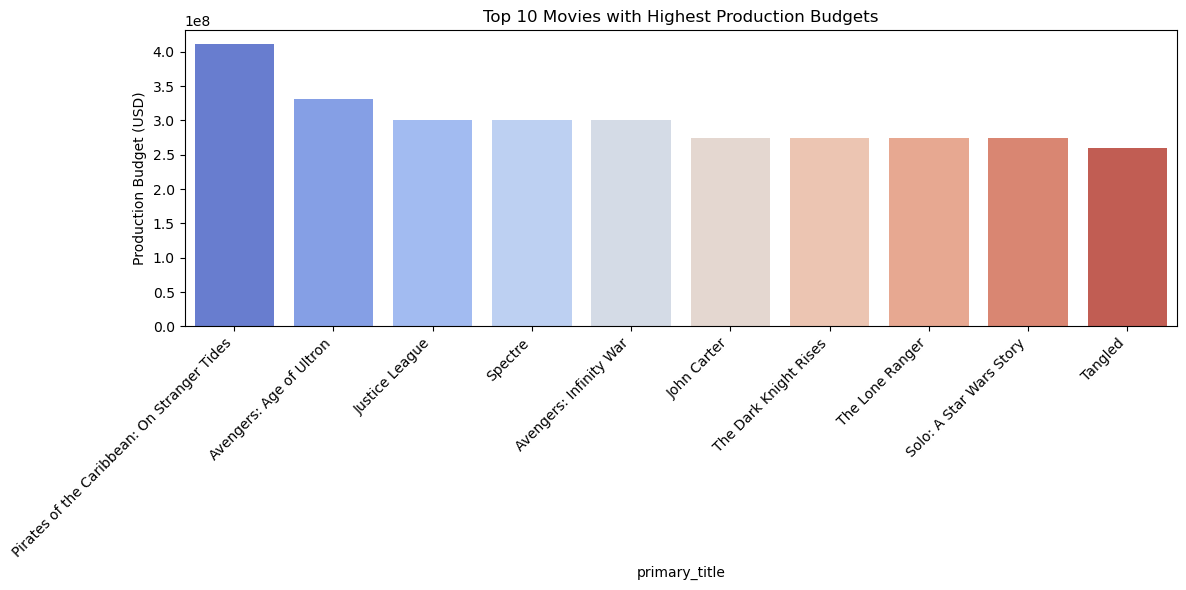

In [72]:
# Top 10 movies with highest production budget
top10_budget = (
    df[['primary_title', 'release_year', 'production_budget_num']]
    .sort_values(by='production_budget_num', ascending=False)
    .head(10)
)

# Create a bar chart
plt.figure(figsize=(12,6))
sns.barplot(
    data=top10_budget,
    x="primary_title",
    y="production_budget_num",
    hue="primary_title",
    palette="coolwarm",
    legend=False
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Production Budget (USD)")
plt.title("Top 10 Movies with Highest Production Budgets")
plt.tight_layout()
plt.show()

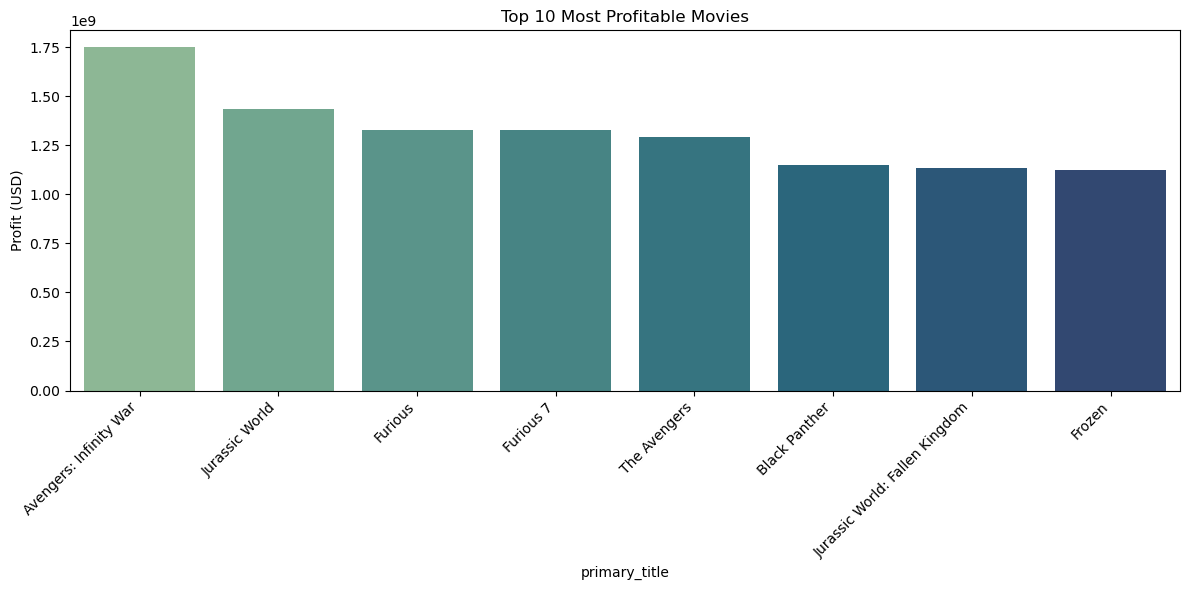

In [73]:
# Select top 10 by profit
top10_profit = (
    df[['primary_title', 'release_year', 'genres', 'profit_num']]
    .sort_values(by='profit_num', ascending=False)
    .head(10)
)

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(
    data=top10_profit,
    x="primary_title",
    y="profit_num",
    hue="primary_title",
    palette="crest",
    legend=False
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Profit (USD)")
plt.title("Top 10 Most Profitable Movies")
plt.tight_layout()
plt.show()

In [74]:
df = df[df['release_year'] <= 2018]

   release_year      median          mean
0          2010  31566967.0  9.921173e+07
1          2011  22237142.5  7.480902e+07
2          2012  31239258.0  1.199557e+08
3          2013  28680687.5  1.011923e+08
4          2014  29160316.0  1.090968e+08


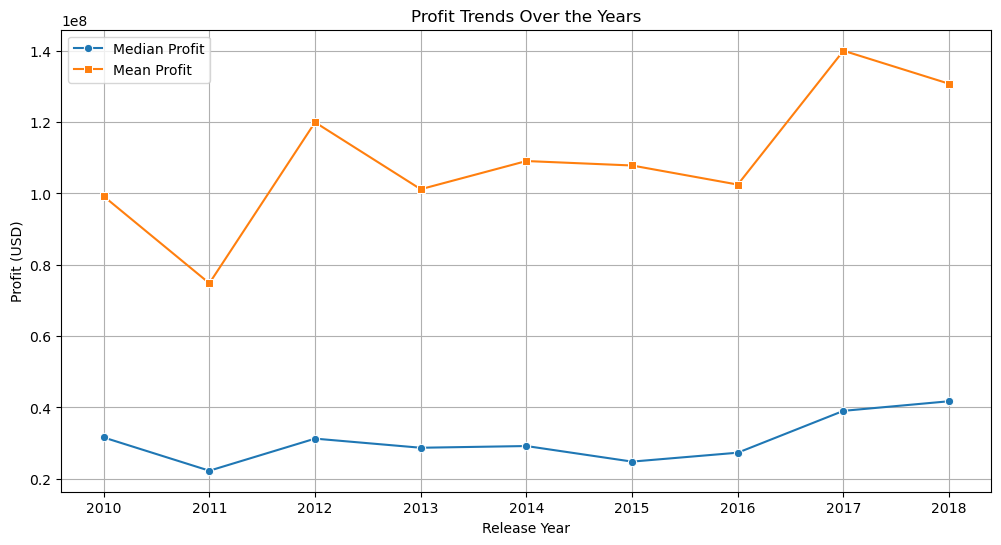

In [75]:
# Group by release year and calculate median & mean profit
profit_trend = df.groupby('release_year')['profit_num'].agg(['median', 'mean']).reset_index()

print(profit_trend.head())

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=profit_trend, x="release_year", y="median", label="Median Profit", marker="o")
sns.lineplot(data=profit_trend, x="release_year", y="mean", label="Mean Profit", marker="s")

plt.title("Profit Trends Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Profit (USD)")
plt.legend()
plt.grid(True)
plt.show()

Top Genres by Popularity:
                      genres  popularity
0  Adventure,Fantasy,Mystery   33.533000
1          Adventure,Fantasy   29.277000
2       Drama,Family,Fantasy   29.056000
3      Action,Mystery,Sci-Fi   28.043000
4     Adventure,Drama,Sci-Fi   25.648000
5    Action,Adventure,Sci-Fi   25.618804
6   Adventure,Mystery,Sci-Fi   24.980000
7    Action,Adventure,Comedy   24.457360
8         Action,Fantasy,War   23.680000
9   Action,Adventure,Fantasy   22.693553


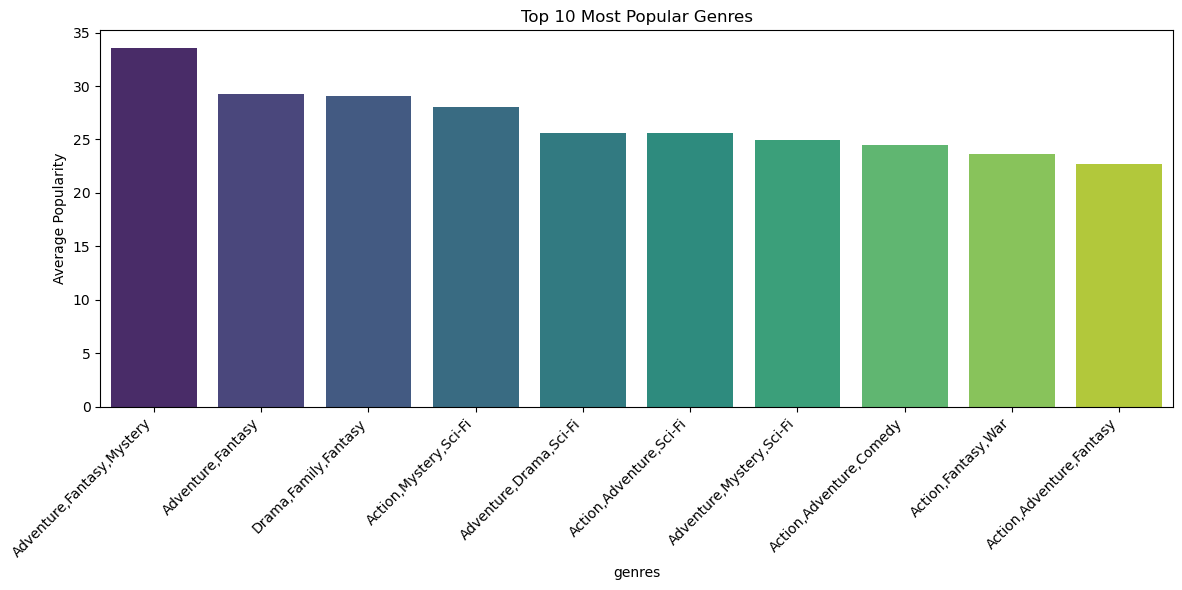

In [76]:
## Group by genre and calculate average popularity
genre_popularity = (
    df.groupby('genres')['popularity']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

print("Top Genres by Popularity:")
print(genre_popularity.head(10))

# Plot top 10 genres
plt.figure(figsize=(12,6))
sns.barplot(
    data=genre_popularity.head(10),
    x="genres",
    y="popularity",
    hue="genres",
    palette="viridis",
    legend=False
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Popularity")
plt.title("Top 10 Most Popular Genres")
plt.tight_layout()
plt.show()

Bottom Genres by Popularity:
                         genres  popularity
0              Comedy,Music,War       5.203
1         Drama,History,Mystery       6.056
2            Drama,Family,Sport       6.080
3            Crime,Drama,Sci-Fi       6.182
4             Documentary,Drama       6.202
5       Comedy,Fantasy,Thriller       6.495
6  Biography,Documentary,Family       6.682
7        Animation,Comedy,Crime       6.906
8    Adventure,Biography,Comedy       6.935
9         Adventure,Crime,Drama       7.179


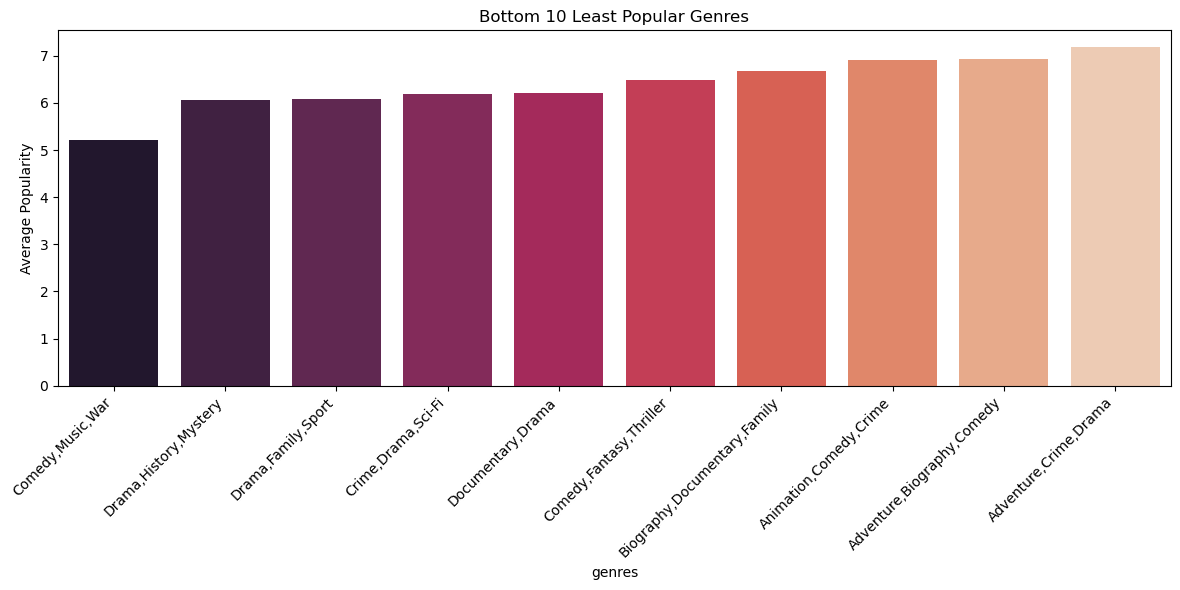

In [77]:
# Group by genre and calculate average popularity
genre_popularity = (
    df.groupby('genres')['popularity']
    .mean()
    .sort_values(ascending=True)   # sort ascending for least popular
    .reset_index()
)

print("Bottom Genres by Popularity:")
print(genre_popularity.head(10))

# Plot bottom 10 genres
plt.figure(figsize=(12,6))
sns.barplot(
    data=genre_popularity.head(10),
    x="genres",
    y="popularity",
    hue="genres",
    palette="rocket",
    legend=False
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Popularity")
plt.title("Bottom 10 Least Popular Genres")
plt.tight_layout()
plt.show()

   release_year          mean      median
0          2010  5.030625e+07  30000000.0
1          2011  4.187276e+07  26500000.0
2          2012  4.781881e+07  26000000.0
3          2013  4.816456e+07  25000000.0
4          2014  4.050141e+07  20000000.0


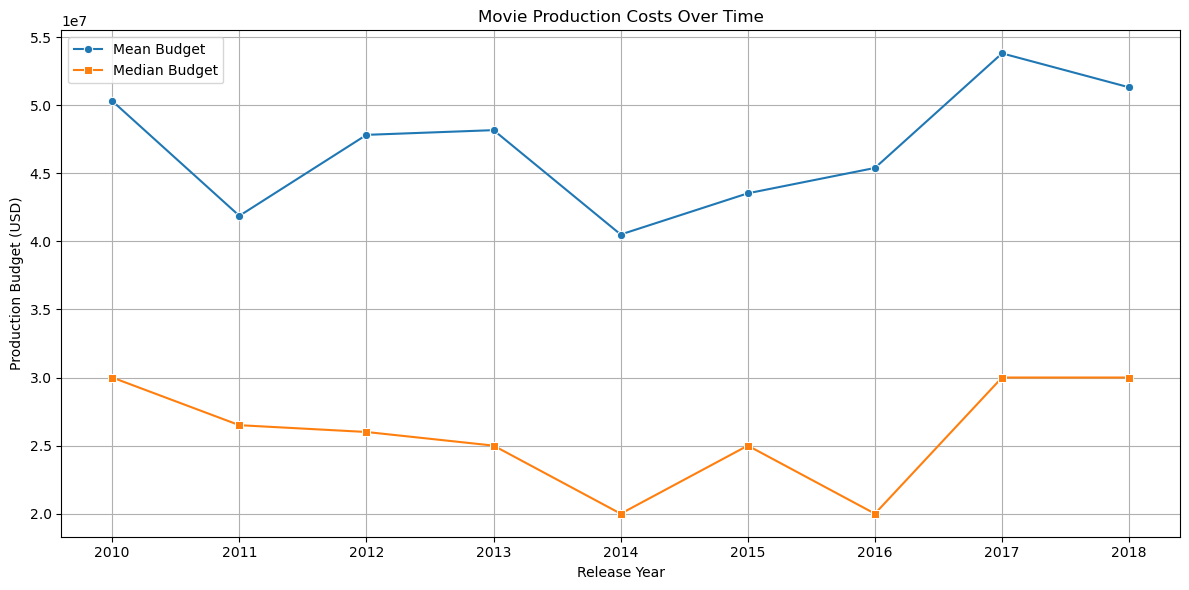

In [78]:
# Group by release year and calculate mean & median production budget
budget_trend = df.groupby('release_year')['production_budget_num'].agg(['mean', 'median']).reset_index()

print(budget_trend.head())

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=budget_trend, x="release_year", y="mean", label="Mean Budget", marker="o")
sns.lineplot(data=budget_trend, x="release_year", y="median", label="Median Budget", marker="s")

plt.title("Movie Production Costs Over Time")
plt.xlabel("Release Year")
plt.ylabel("Production Budget (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

   release_year          mean      median
0          2010  9.921173e+07  31566967.0
1          2011  7.480902e+07  22237142.5
2          2012  1.199557e+08  31239258.0
3          2013  1.011923e+08  28680687.5
4          2014  1.090968e+08  29160316.0


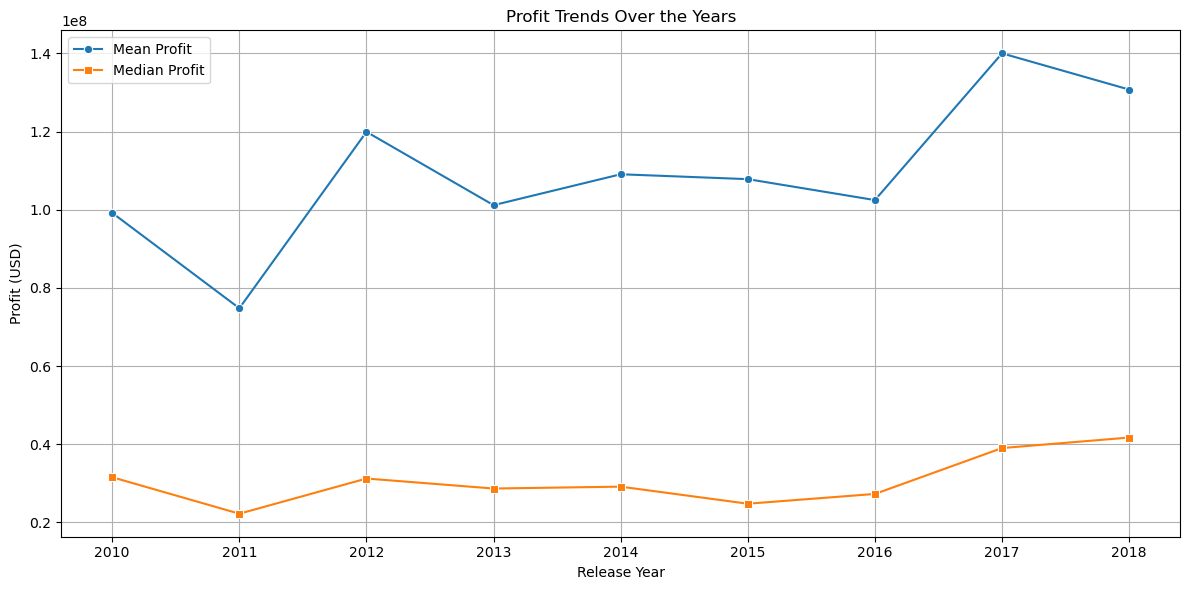

In [79]:
# Group by release year and calculate mean & median profit
profit_trend = df.groupby('release_year')['profit_num'].agg(['mean', 'median']).reset_index()

print(profit_trend.head())

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=profit_trend, x="release_year", y="mean", label="Mean Profit", marker="o")
sns.lineplot(data=profit_trend, x="release_year", y="median", label="Median Profit", marker="s")

plt.title("Profit Trends Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Profit (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

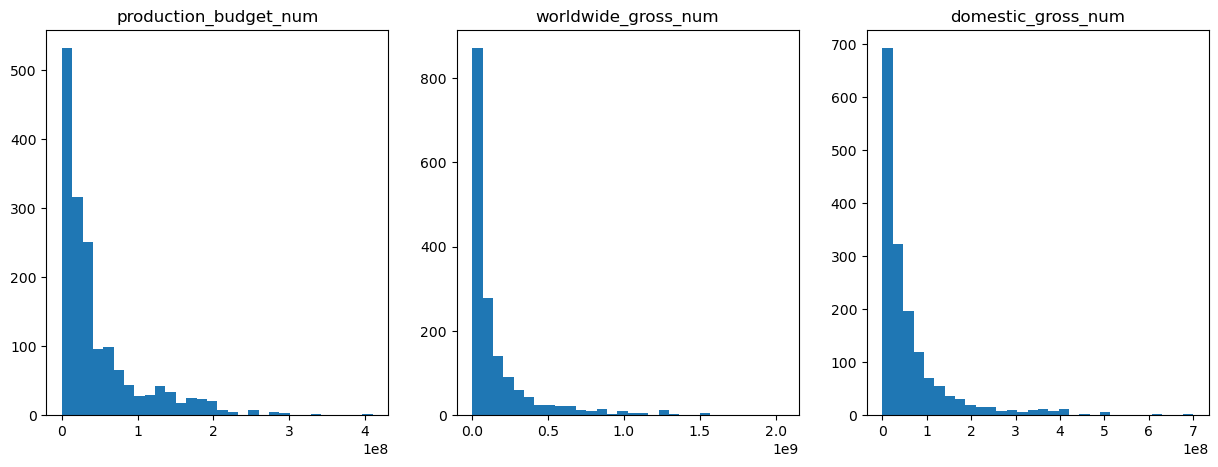

In [80]:
# Summary stats
df[["production_budget_num", "worldwide_gross_num", "domestic_gross_num"]].describe()

# Skewness
df[["production_budget_num", "worldwide_gross_num", "domestic_gross_num"]].skew()

# Histograms
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15,5))
for i, col in enumerate(["production_budget_num", "worldwide_gross_num", "domestic_gross_num"]):
    axes[i].hist(df[col], bins=30)
    axes[i].set_title(col)
plt.show()

In [81]:
# 5. Skewness check
print("\n=== Skewness ===")
print(df[["production_budget_num", "domestic_gross_num", "worldwide_gross_num"]].skew())


=== Skewness ===
production_budget_num    1.960878
domestic_gross_num       2.901162
worldwide_gross_num      2.942043
dtype: float64


=== Skewness After Log Transform ===
log_budget            -0.988765
log_domestic_gross    -2.767916
log_worldwide_gross   -3.282371
dtype: float64


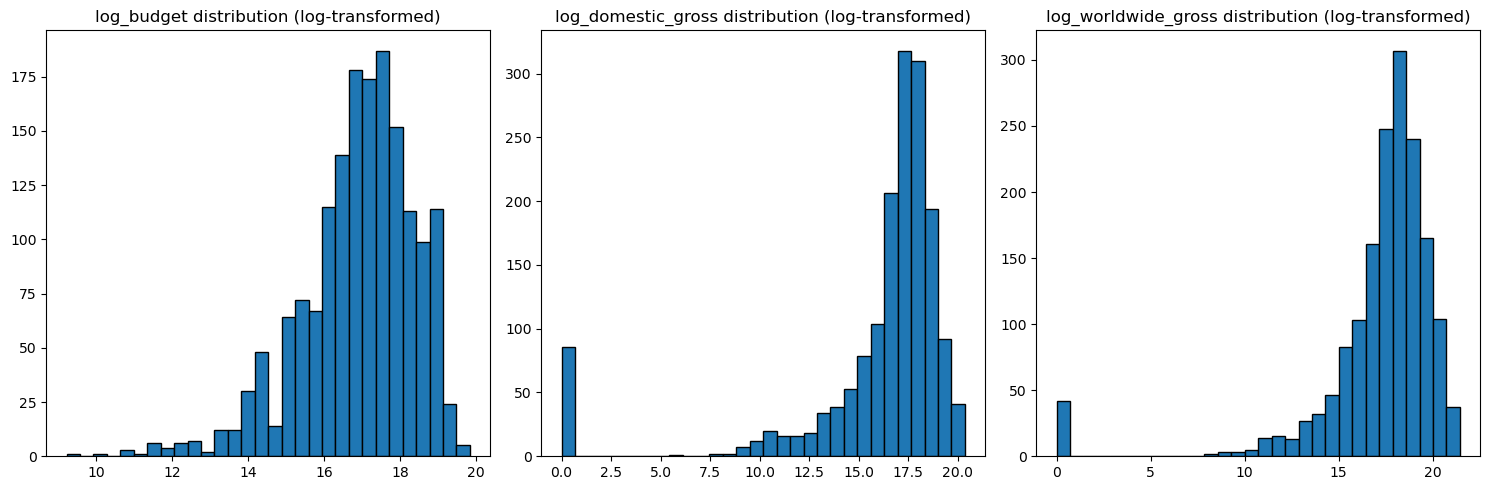

In [82]:

# Log transform skewed fields
df["log_budget"] = np.log1p(df["production_budget_num"])
df["log_domestic_gross"] = np.log1p(df["domestic_gross_num"])
df["log_worldwide_gross"] = np.log1p(df["worldwide_gross_num"])

# Check skewness after log transform
print("=== Skewness After Log Transform ===")
print(df[["log_budget", "log_domestic_gross", "log_worldwide_gross"]].skew())

# Quick histograms
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15,5))
cols = ["log_budget", "log_domestic_gross", "log_worldwide_gross"]

for i, col in enumerate(cols):
    axes[i].hist(df[col].dropna(), bins=30, edgecolor="black")
    axes[i].set_title(f"{col} distribution (log-transformed)")
plt.tight_layout()
plt.show()

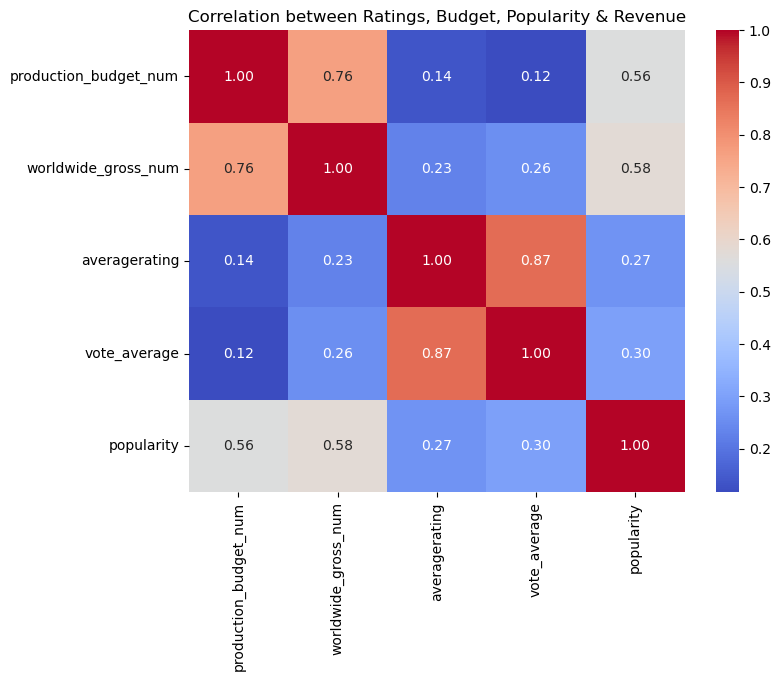

In [83]:
# Subset numerical columns of interest
corr_cols = ["production_budget_num", "worldwide_gross_num", "averagerating", "vote_average", "popularity"]
corr = df[corr_cols].corr()

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Ratings, Budget, Popularity & Revenue")
plt.show()

=== Correlation Matrix ===
                     averagerating  vote_average  combined_score  log_budget  \
averagerating                1.000         0.866           0.505       0.094   
vote_average                 0.866         1.000           0.476       0.087   
combined_score               0.505         0.476           1.000       0.371   
log_budget                   0.094         0.087           0.371       1.000   
log_worldwide_gross          0.189         0.208           0.335       0.577   
log_domestic_gross           0.201         0.223           0.305       0.508   
log_popularity               0.260         0.292           0.525       0.467   

                     log_worldwide_gross  log_domestic_gross  log_popularity  
averagerating                      0.189               0.201           0.260  
vote_average                       0.208               0.223           0.292  
combined_score                     0.335               0.305           0.525  
log_budget      

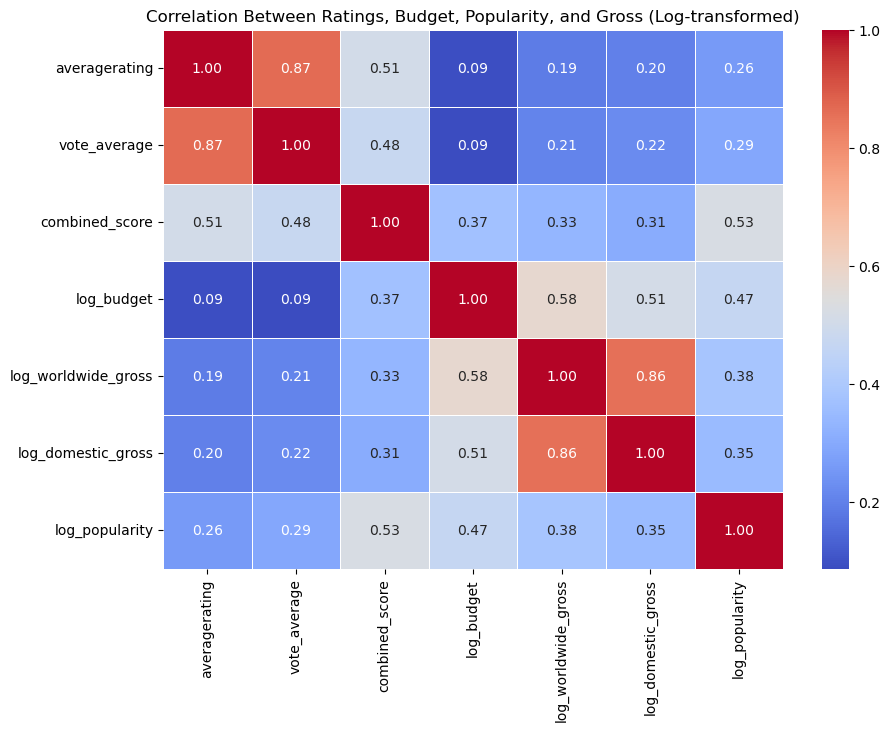

In [84]:
# Select only the numeric columns we care about
corr_cols = [
    "averagerating", "vote_average", "combined_score",
    "log_budget", "log_worldwide_gross", "log_domestic_gross",
    "log_popularity"
]

# Correlation matrix
corr_matrix = df[corr_cols].corr(method="pearson")

print("=== Correlation Matrix ===")
print(corr_matrix.round(3))

# Heatmap for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Ratings, Budget, Popularity, and Gross (Log-transformed)")
plt.show()

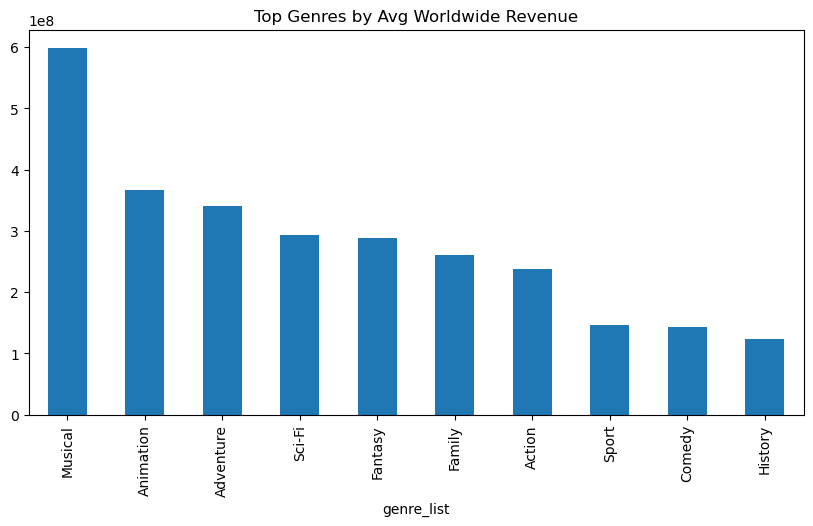

In [85]:
# Split genre string into list
df["genre_list"] = df["genres"].str.split(",")

# Explode into rows
df_genres = df.explode("genre_list")

# Group by single genres
genre_revenue = df_genres.groupby("genre_list")["worldwide_gross_num"].mean().sort_values(ascending=False)

# Top 10 genres
genre_revenue.head(10).plot(kind="bar", figsize=(10,5), title="Top Genres by Avg Worldwide Revenue")
plt.show()

In [86]:

# 1. Percentage of profitable movies
profitable_ratio = (df["profit_num"] > 0).mean() * 100

# 2. Average profit
avg_profit = df["profit_num"].mean()

# 3. One-sample t-test: H0: mean profit = 0, H1: mean profit > 0
t_stat, p_val = stats.ttest_1samp(df["profit_num"], 0)

print(f"✅ Percentage of profitable movies: {profitable_ratio:.2f}%")
print(f"✅ Average profit: ${avg_profit:,.0f}")
print(f"✅ One-sample t-test: t = {t_stat:.3f}, p = {p_val:.5f}")

# Business decision
if p_val/2 < 0.05 and t_stat > 0:  # one-tailed test
    print("Conclusion: Movies are significantly profitable (mean profit > 0 at 95% confidence).")
else:
    print("Conclusion: We cannot confirm the movie industry is significantly profitable.")

✅ Percentage of profitable movies: 75.09%
✅ Average profit: $107,873,804
✅ One-sample t-test: t = 21.110, p = 0.00000
Conclusion: Movies are significantly profitable (mean profit > 0 at 95% confidence).


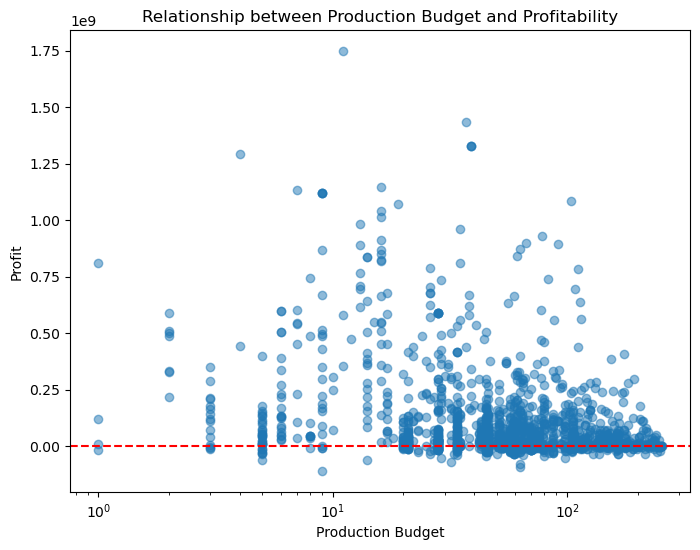

In [87]:
# 🔹 Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df["production_budget"], df["profit_num"], alpha=0.5)
plt.xlabel("Production Budget")
plt.ylabel("Profit")
plt.title("Relationship between Production Budget and Profitability")
plt.xscale("log")   # optional (budgets vary a lot)
plt.axhline(0, color="red", linestyle="--")
plt.show()


In [88]:
df["budget"] = pd.to_numeric(df["production_budget"].astype(str).str.replace(r'[\$,]', '', regex=True), errors="coerce")

# Create the same 3 budget groups

df["budget_group"] = pd.qcut(df["budget"], 3, labels=["Low", "Medium", "High"])

# Get the bin edges (ranges)
_, bins = pd.qcut(df["budget"], 3, retbins=True, labels=["Low","Medium","High"])

print("Budget group ranges and average profits:")
for label, lower, upper in zip(["Low","Medium","High"], bins[:-1], bins[1:]):
    avg_profit = df[df["budget_group"]==label]["profit_num"].mean()
    print(f"{label:6} : {lower:,.0f} – {upper:,.0f} | Avg Profit = {avg_profit:,.0f}")

Budget group ranges and average profits:
Low    : 10,000 – 15,000,000 | Avg Profit = 26,560,946
Medium : 15,000,000 – 42,000,000 | Avg Profit = 54,836,164
High   : 42,000,000 – 410,600,000 | Avg Profit = 246,318,166


In [89]:
# List movies in each budget category
# Show only first 20 movies per budget group
for label in ["Low", "Medium", "High"]:
    movies = (
        df[df["budget_group"]==label][["movie","budget","profit_num"]]
        .sort_values("budget")
        .head(20)
    )
    print(f"\n {label} Budget Movies (first 20):")
    print(movies.to_string(index=False))



 Low Budget Movies (first 20):
                movie  budget  profit_num
                 Cure   10000     84596.0
               Exeter   25000    464792.0
         A True Story   45000    -45000.0
        Bending Steel   50000    -50000.0
           The Signal   50000    356299.0
             Absentia   70000    -61445.0
Indie Game: The Movie  100000   -100000.0
        A Ghost Story  100000   2669782.0
        Cheap Thrills  100000    -40576.0
          The Gallows  100000  41556474.0
          The Gallows  100000  41556474.0
The Birth of a Nation  110000  10890000.0
 Your Sister's Sister  120000   2970593.0
    Sound of My Voice  135000    294448.0
          The Calling  160000   -127908.0
          The Calling  160000   -127908.0
        Another Earth  175000   1927779.0
              Weekend  190000   1387585.0
         Side Effects  200000   -155299.0
        The Overnight  200000    965996.0

 Medium Budget Movies (first 20):
                  movie   budget  profit_num
      

In [90]:
# Count genres per budget group
genre_counts = df.groupby(["budget_group","genres"],observed=True).size().reset_index(name="count")

print("\n Top 5 Genres in Each Budget Group:")
for label in ["Low", "Medium", "High"]:
    top_genres = genre_counts[genre_counts["budget_group"]==label].nlargest(5, "count")
    print(f"\n{label} Budget:")
    print(top_genres[["genres","count"]].to_string(index=False))


 Top 5 Genres in Each Budget Group:

Low Budget:
                 genres  count
   Comedy,Drama,Romance     39
                  Drama     33
Horror,Mystery,Thriller     29
           Comedy,Drama     28
        Horror,Thriller     28

Medium Budget:
              genres  count
      Comedy,Romance     26
  Action,Crime,Drama     24
              Comedy     21
        Comedy,Drama     20
Comedy,Drama,Romance     18

High Budget:
                    genres  count
Adventure,Animation,Comedy     63
   Action,Adventure,Sci-Fi     52
  Action,Adventure,Fantasy     33
    Action,Adventure,Drama     24
   Action,Adventure,Comedy     20


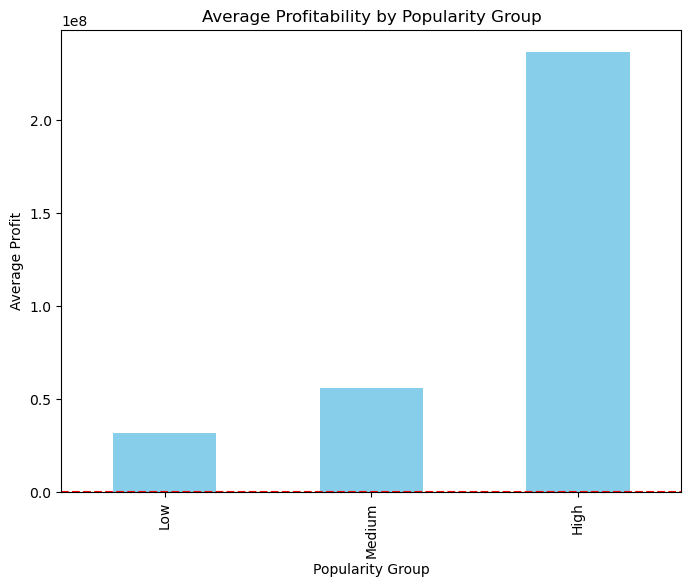

In [91]:
# Create popularity groups (3 groups: Low, Medium, High)
df["popularity_group"] = pd.qcut(df["popularity"], 3, labels=["Low","Medium","High"])

# Compute mean profits for each popularity group
group_means = df.groupby("popularity_group",observed=False)["profit_num"].mean()

# Plot
group_means.plot(kind="bar", color="skyblue", figsize=(8,6))
plt.title("Average Profitability by Popularity Group")
plt.ylabel("Average Profit")
plt.xlabel("Popularity Group")
plt.axhline(0, color="red", linestyle="--")
plt.show()

In [92]:

# Top 10 movies per budget group by popularity
for label in ["Low", "Medium", "High"]:
    top_movies = (
        df[df["budget_group"]==label][["movie","genres","popularity","profit_num"]]
        .sort_values("popularity", ascending=False)
        .head(10)
    )
    print(f"\n Top 10 Popular Movies in {label} Budget Category:")
    print(top_movies.to_string(index=False))


 Top 10 Popular Movies in Low Budget Category:
                       movie                   genres  popularity  profit_num
          The Imitation Game Biography,Drama,Thriller      33.078 212740463.0
                  Cinderella     Drama,Family,Fantasy      29.056 260691415.0
                    Whiplash              Drama,Music      28.784  35669037.0
               The Favourite  Biography,Drama,History      28.651  79113929.0
             The First Purge     Action,Horror,Sci-Fi      28.440 123617305.0
          The Purge: Anarchy     Action,Horror,Sci-Fi      28.424 102534881.0
                  Hereditary     Drama,Horror,Mystery      26.185  60133905.0
                       Split          Horror,Thriller      25.783 273964806.0
Teenage Mutant Ninja Turtles  Action,Adventure,Comedy      25.619 188500000.0
                Nightcrawler     Crime,Drama,Thriller      25.597  41834418.0

 Top 10 Popular Movies in Medium Budget Category:
                     movie                 

In [93]:
# Top 10 profitable movies sorted by popularity
top_profitable_popular = (
    df.sort_values(["profit_num","popularity"], ascending=[False,False])
    [["movie","genres","budget","profit_num","popularity"]]
    .head(10)
)

print("Top 10 Most Profitable Movies by Popularity:")
print(top_profitable_popular.to_string(index=False))

Top 10 Most Profitable Movies by Popularity:
                         movie                     genres    budget   profit_num  popularity
        Avengers: Infinity War    Action,Adventure,Sci-Fi 300000000 1748134200.0      80.773
                Jurassic World    Action,Adventure,Sci-Fi 215000000 1433854864.0      20.709
                     Furious 7      Action,Crime,Thriller 190000000 1328722794.0      20.396
                     Furious 7             Action,History 190000000 1328722794.0      20.396
                     Furious 7                      Drama 190000000 1328722794.0      20.396
                  The Avengers    Action,Adventure,Sci-Fi 225000000 1292935897.0      50.289
                 Black Panther    Action,Adventure,Sci-Fi 200000000 1148258224.0      44.140
Jurassic World: Fallen Kingdom    Action,Adventure,Sci-Fi 170000000 1135772799.0      34.958
                        Frozen Adventure,Animation,Comedy 150000000 1122469910.0      26.183
                        F


### Key Findings from the Analysis 

* **High Profitability in the Market**: A significant majority of movies, **75.1%**, are profitable, indicating a healthy market for new entries.
* **Genre is a Key Profit Driver**: The analysis consistently shows that **Adventure, Sci-Fi, and Animation** are the top-grossing genres. The worldwide gross revenue for these genres is substantially higher than for others.
* **International Box Office is Crucial**: Foreign (international) gross revenue is a major contributor to the overall success of top-performing movies, often exceeding domestic gross.
* **Budget and Ratings Impact Success**: The analysis reveals a positive correlation between production budget and worldwide gross. Similarly, higher-rated movies tend to earn more at the box office.

### Strategic Recommendations for G5 Cinemax

Given these findings, here are the actionable recommendations for your new studio:

1.  **Focus on High-Performing Genres**:
    * **Prioritize Investment**: G5 Cinemax should prioritize producing films in the **Adventure, Sci-Fi, and Animation** genres. These have the highest potential for significant returns on investment.
    * **Combine Genres**: Consider creating films that blend these top genres, such as "Action, Adventure, Sci-Fi," a combination that appears frequently among the most profitable movies.

2.  **Develop a Global-First Strategy**:
    * **International Appeal**: Create stories with universal themes and diverse casting to maximize appeal to international audiences. The foreign box office is not just supplementary—it's essential for blockbuster success.
    * **Marketing**: Plan for robust international marketing and distribution strategies from the very beginning of the production process.

3.  **Smart Budgeting for High Returns**:
    * **Invest Competitively**: While not all big-budget films succeed, there is a clear trend that higher production budgets correlate with higher worldwide gross. G5 Cinemax should be prepared to invest competitively in its chosen projects.
    * **Control Costs**: Focus on a strong return on investment (ROI). Even with a large budget, fiscal prudence is necessary to ensure profitability.

4.  **Aim for Quality**:
    * **Good Ratings Matter**: Higher audience and critic ratings are linked to better box office performance. Invest in strong scripts, talented directors, and high production values to create quality films that resonate with viewers.

By focusing on these data-driven strategies, G5 Cinemax can position itself to enter the market competitively and increase its chances of producing commercially successful and profitable films.

### OTHER ANALYSIS TO CODUCT

1. Analysis whether sequels and remakes are more profitable than original titles
2. Trends in ratings and profitability from later movies i.e 2019 to 2025
3. Analyis of TV Shows and whether the studio could focus on them besides standalone movies
4. Analysis of Target audience i.e Are movies meant for children profitable than movies meant for adults